   # Tesla Model S Inducion Motor Design

## 1.Introduction

In this Project, an induction motor will be designed. This motor is used in Tesla s model cars which has a few different variations. For an example, the RWD 85 Model Tesla car will be used for the design. Here are the induction motor specifications for RWD 85 :

✓ Maximum Power: 360 hp (270 kW)

✓ Maximum Torque: 441 Nm

✓ Top Speed: 225 km/h

For more detailed specifications can be found in [Tesla Model S](http://teslatap.com/undocumented/) and [Tesla Model S Motor](https://forums.teslamotors.com/it_IT/forum/forums/tesla-model-s-motor-output).

Here are some photos of Tesla Model S cars [1]: 

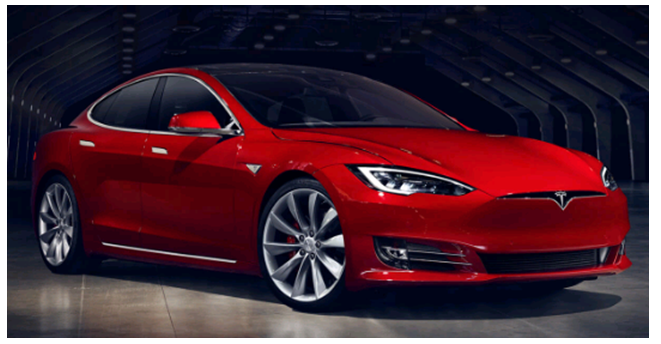

In [13]:
from IPython.display import Image
Image(filename='tesla1.png', width=600, height=500)

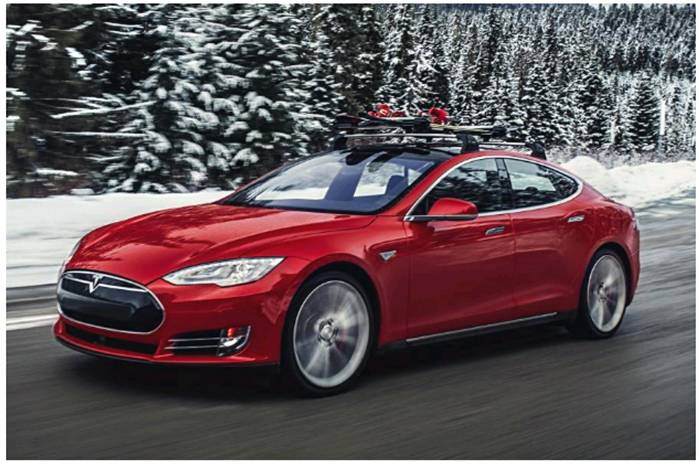

In [14]:
from IPython.display import Image
Image(filename='tesla2.png', width=600, height=500)

Here is a summarized table for all Model S cars [2]:

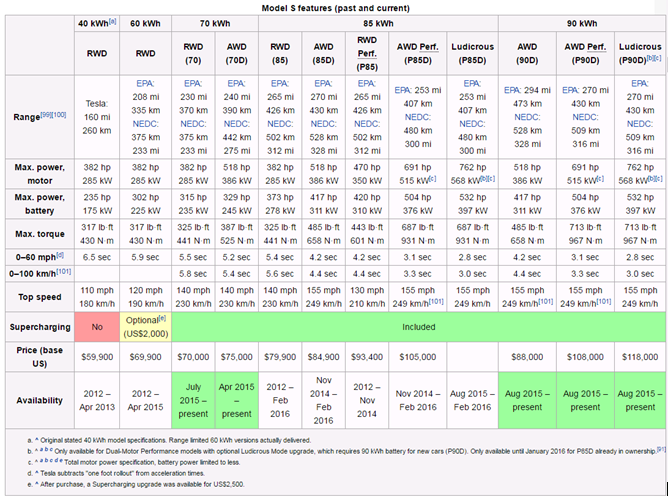

In [15]:
from IPython.display import Image
Image(filename='tesla3.png', width=600, height=500)

Here is the Tesla model S cars sales/registrations table by countries [3]:

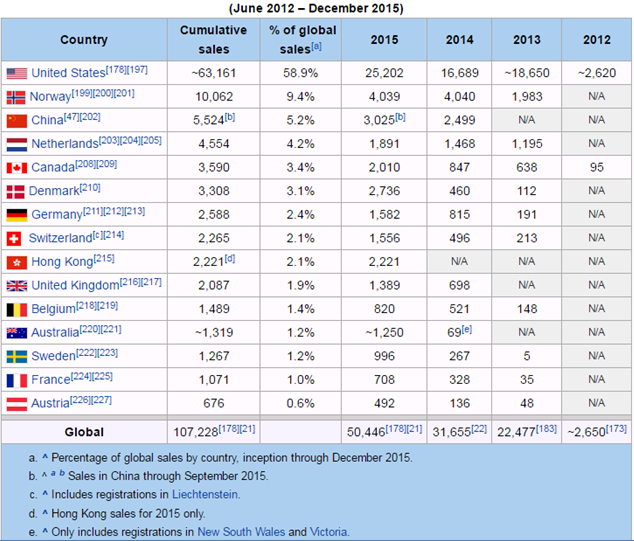

In [16]:
from IPython.display import Image
Image(filename='tesla4.png', width=600, height=500)

Here is an image of Tesla Model S car motor [4]: 

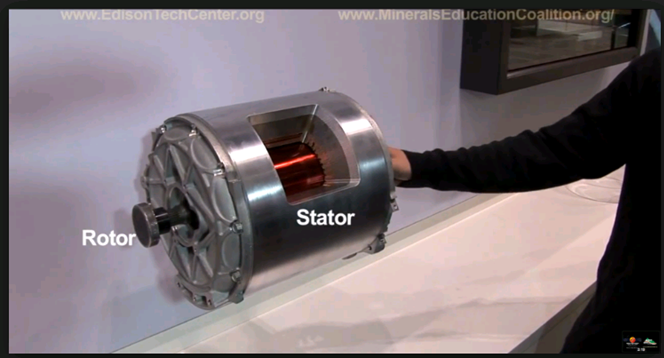

In [17]:
from IPython.display import Image
Image(filename='tesla5.png', width=600, height=500)

## 2.Design

For the design procedures of induction motor, 'I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002' has been used as reference guide.

From [5], the battery voltage of the car is composed of 96 cells series which have 4.2 Volts. The total battery voltage can be considered as 400 Volts approximately.

In [1]:
import math
Pr= 270000   #Rated power
Vbat=400     #Battery voltage
Vbat_ll=400*math.sqrt(2)  #Maximum line to line voltage
Vbat_ln=Vbat_ll/math.sqrt(3) #Line to neutral voltage
print('Vln=',round(Vbat_ln),'Volts')

Vln= 327 Volts


The machine is three phase machine and number of pole-pairs is selected as 2

In [2]:
m=3     #Number of phase
pp=2     #Number of pole-pairs
p=4   #Number of poles

Target efficiency can be thought as 0.96 and the power factor is 0.84

In [3]:
eff=0.96  #Efficiency
pf= 0.84 #Power factor

Maximum speed of Tesla RWD 85 is 230 km/h, the maximum power of the motor is 285 kW and the maximum torque is 441 Nm [2].
Tesla Model S wheel radius are 21 inches and 19 inches [6]. I choose 19 inches one. The gear ratio is 9.73 [2].

In [4]:
Pmax=285000  #Maximum motor power
Tmax= 441  #Maximum torque
gr=9.73 #Gear ratio 
Speed_max_kmh= 230 #Maximum speed in km/h
Speed_max_ms= (Speed_max_kmh*1000)/3600 #Maximum speed in m/s
Rtire= 48.26 #Tesla Model S tire radius in cm
Speed_max_rpm=(Speed_max_ms*2*math.pi*(Rtire/100)*gr*60)/(2*math.pi) #Maximum speed in rpm

For an induction motor frequency and speed relation as follows:
$n=\frac{120*f}{p}\qquad$

In [5]:
freq_max=(Speed_max_rpm*p)/120  #Frequency at 230 km/h speed (max speed)

If we assume that the average speed of the car is 82 km/h, we have to recalculate the average frequency.

In [6]:
freq=(freq_max*82)/230 #Frequency at the average speed of 82 km/h
print('Average frequency=',round(freq),'Hz')

Average frequency= 214 Hz


In [7]:
I_line=Pmax/((Vbat_ln*math.sqrt(3)/math.sqrt(2))*pf*eff) #Maximum line current
print(I_line)

883.5565476190476


### 2.1.Main Dimensions of Stator Core

The stator bore diameter can be calculated as, 
$D_{is} = \sqrt[3]{\frac{2p}{\pi\lambda}\frac{pp}{f_1}\frac{S_{gap}}{C_0}}\qquad$    
where, 
     $S_{gap}=\frac{K_EP_n}{\eta_ncos\phi_{1n}}\qquad$

and              $K_E=0.98-0.005pp\qquad$


In [8]:
KE=0.98-0.005*pp 
Sgap=(KE*Pmax)/(eff*pf)  #apparent airgap power
print(Sgap)

342819.94047619053


In the formula $\lambda$ represent stack aspect ratio. Stack aspect ratio can be determined with the following table:

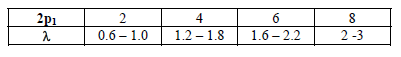

In [9]:
from IPython.display import Image
Image(filename='table1.png', width=600, height=500)

Also, in the formula $C_0$ represent Esson's constant. Esson's constant can be determined with the following curve:

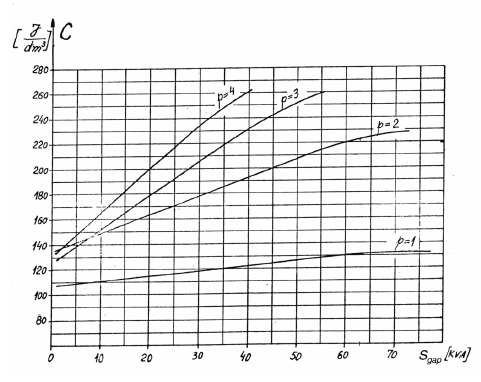

In [10]:
from IPython.display import Image
Image(filename='Esson.png', width=600, height=500)

We can set the stack aspect ratio as 1.5 and Esson's coefficient as 240000 because at 342 kVA apparent airgap power Esson's coefficient curve for 2 pole-pair will reach approximately 240000.

In [11]:
lambda_=1.5 #stack aspect ratio
C0=240000 #Esson's coefficient
Dis=math.pow((2.0*pp*pp*Sgap)/(math.pi*lambda_*freq*C0),1.0/3.0)  #stator bore diameter in m
print(Dis)

0.22464015728508213


Stack lenght and pole pitch can be calculated from this equation

$\lambda=L(\frac{2pp}{\pi{D_{is}}})=\frac{L}{\tau}\qquad$

In [12]:
L=(lambda_*math.pi*Dis)/(2*pp)  #stack lenght in m
print(L)
tau=(math.pi*Dis)/(2*pp)  #pole pitch in m
print(tau)

0.26464795043552614
0.1764319669570174


The number of stator slots per pole 3q may be 3⋅2 = 6 or 3⋅3 = 9. For q = 3,
the slot pitch $\tau_s$ will be around  $\tau_s=\frac{\tau}{3q}\qquad$

In [13]:
q=4 #number of slots per phase
taus=tau/(m*q) # Slot pitch in m
print(taus)

0.014702663913084784


Inner/outer stator diameter ratio, $K_D$, can be chosen from the following table;

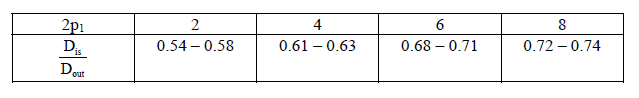

In [19]:
from IPython.display import Image
Image(filename='table2.png', width=600, height=500)

From the table for 2 pole-pair motor inner/outer stator diameter ratio cane be chosen as 0.62

In [21]:
KD=0.62 #inner/outer stator diameter ratio
Dout=Dis/KD   #stator outer diameter in m
print(Dout)

0.3623228343307776


The airgap value can be calculated from $g=(0.1+0.012+\sqrt[3]{P_{max}}10^-3\qquad$

In [14]:
g=(0.1+0.012*math.pow(Pmax,1.0/3.0))*1e-3   #airgap length in m
print(g)

0.0008897013238289671


### 2.2.The Stator Winding

In [15]:
Ns=2*pp*q*m  #Number of stator slots
print (Ns)

48


Two-layer winding with chorded coils: y/$\tau$=5/6 is chosen as 5/6=0.833 is close to 0.8 which would reduce the 5th and 7th harmonics.

The electrical angle between emfs in neighboring slots $\alpha_{ec}$ is $\alpha_{ec}=\frac{2\pi{pp}}{N_s}\qquad$

In [17]:
alpha_ec=(2*math.pi*pp)/(Ns) #electrical angle between emfs
print(alpha_ec)

0.2617993877991494


The star of emf phasors has 48/2=24 arrows and the distribution of phases in slots will be shown in the motor analysis program.

Distribution factor can be as: 
$K_{q1}=\frac{sin\frac{\pi}{6}}{qsin\frac{\pi}{6q}}\qquad$

In [19]:
Kq1=(math.sin(math.pi/6))/(q*math.sin(math.pi/(6*q)))  #Distribution factor
print (Kq1)

0.9576621969425486


Chording factor can be calculates as, $K_{y1}=sin\frac{\pi}{2}\frac{y}{\tau}\qquad$

In [20]:
Ky1=math.sin((math.pi*5)/(2*6))
print(Ky1)

0.9659258262890683


And the stator winding factor becomes $K_{w1}=K_{q1}K_{y1}\qquad$

In [23]:
Kw1=Kq1*Ky1 #stator winding factor
print(Kw1)

0.9250306488875357


The recommended values for the flux densities are in the intervals:<br />
$B_{g}=(0.5-0.75)T\quad for\quad 2(pp)=2\qquad$<br />
$B_{g}=(0.65-0.78)T\quad for\quad 2(pp)=4\qquad$<br /> 
$B_{g}=(0.7-0.82)T\quad for\quad 2(pp)=6\qquad$<br />
$B_{g}=(0.75-0.85)T\quad for\quad 2(pp)=8\qquad$<br />

For 2 pole-pairs we can choose flux density as 0.7 Tesla.

In [24]:
Bg=0.7 #airgap flux density in tesla

The pole spanning coefficienct depends on tooth saturation factor. If we consider saturation factor as 1.4 with the pole spanning coefficient as 0.729 we can determine the value of the form factor from the following figure, 

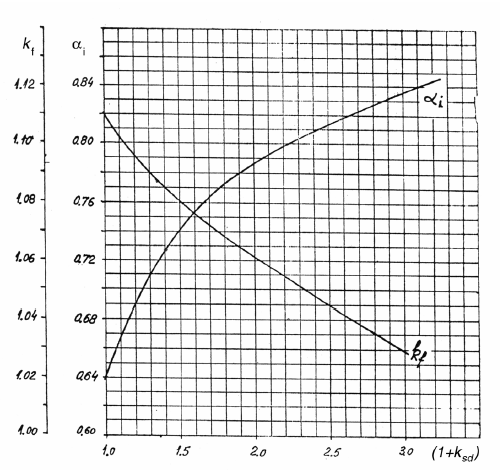

In [25]:
from IPython.display import Image
Image(filename='formfactor.png', width=400, height=400)

In [26]:
Kf=1.085 #Form factor
alpha_i=0.729 #pole spanning coefficient

The number of turns per phase is based on the pole flux $\phi$, <br />
$\phi=\alpha_i\tau{L}B_g\qquad$ <br /><br />
The number of turns can be calculated as, <br />
$W_1=\frac{K_EV_{1ph}}{4K_fK_{w1}f_1\phi}\qquad$

In [32]:
phi=alpha_i*tau*L*Bg  #pole flux
W1_f=(KE*Vbat_ln)/(4*Kf*Kw1*freq*phi) #number of turns per phase
print(W1)

16.0


The number of conductors per slot can be calculated as, <br />
$n_s=\frac{a_1W_1}{ppq}\qquad$  where $a_1$ is the number of current paths in parallel

In [33]:
a1=1 #number of current paths in parallel
ns=(a1*W1_f)/(pp*q)
print(ns)

1.9352513223498566


The number of conductors per slot should be an even number as there are two distinct coils per slot in a double layer so we can set the ns value as 2

In [30]:
ns=2 #new number of current paths in parallel
W1=(ns*pp*q)/(a1) #new number of turns per phase
print(W1)

16.0


Now we should recalculate the actual airgap flux density,

In [35]:
Bg=(0.7*W1_f)/(W1)
print(Bg)

0.6773379628224497


The rated current is, <br />
$I_{in}=\frac{P_n}{\eta_ncos\phi_n\sqrt3{V_1}}\qquad$

In [36]:
Iin=(Pmax)/(eff*pf*math.sqrt(3)*Vbat_ln)
print(Iin)

624.7688263832033
